# Experiment 1

In [26]:
import pandas as pd
import json

# Ścieżka do pliku JSON
file_path = 'executed_experiments/experiments_results_base_parameters/all_results.json'

# Otwarcie i wczytanie danych z pliku
with open(file_path, 'r') as file:
    data = file.read()

# Replacing '}{' with '},{'
corrected_data = data.replace("}{", "},{")

# Adding brackets to make it a valid JSON array
json_data = "[" + corrected_data + "]"

# Loading data into a pandas DataFrame
df_list = []
for entry in json.loads(json_data):
    # Flattening the nested 'results' dictionary
    flat_entry = {**entry, **entry.pop('results')}
    df_list.append(flat_entry)

df = pd.DataFrame(df_list)
df[['accuracy', 'precision', 'recall', 'f1_score', 'time']] = df[['accuracy', 'precision', 'recall', 'f1_score', 'time']].round(3)
# Wyświetlenie pierwszych kilku wierszy DataFrame'u
df.head()


,date,algorithm,dataset,labeled_size,hyperparameters,accuracy,precision,recall,f1_score,time
0,2023-11-17 16:18:55,Tri_Training,cifar10,0.3,"{'base_estimator': RandomForestClassifier(), '...",0.608,0.609,0.601,0.605,294.089
1,2023-11-17 16:19:28,Tri_Training,imdb,0.3,"{'base_estimator': RandomForestClassifier(), '...",0.847,0.848,0.846,0.847,18.149
2,2023-11-17 16:19:29,Tri_Training,breast_cancer,0.3,"{'base_estimator': RandomForestClassifier(), '...",0.965,0.959,0.986,0.972,0.545
3,2023-11-17 16:57:26,Assemble,cifar10,0.3,{'base_estimator': RandomForestClassifier()},0.625,0.646,0.554,0.596,2268.513
4,2023-11-17 19:17:28,Assemble,imdb,0.3,{'base_estimator': RandomForestClassifier()},0.789,0.782,0.801,0.791,8219.344


In [7]:
df[df.dataset=='cifar10']

,date,algorithm,dataset,labeled_size,hyperparameters,accuracy,precision,recall,f1_score,time
0,2023-11-17 16:18:55,Tri_Training,cifar10,0.3,"{'base_estimator': RandomForestClassifier(), '...",0.608,0.609,0.601,0.605,294.089
3,2023-11-17 16:57:26,Assemble,cifar10,0.3,{'base_estimator': RandomForestClassifier()},0.625,0.646,0.554,0.596,2268.513
6,2023-11-17 19:27:53,SemiBoost,cifar10,0.3,{'base_estimator': RandomForestClassifier()},0.510,0.505,0.981,0.667,529.442
9,2023-11-18 00:40:11,LapSVM,cifar10,0.3,{},0.500,0.500,1.000,0.667,1170.307
12,2023-11-18 14:10:21,TSVM,cifar10,0.3,{},0.608,0.606,0.616,0.611,27762.706
15,2023-11-19 15:39:52,LabelPropagation,cifar10,0.3,{},0.551,0.563,0.455,0.503,2.837


In [8]:
[print(' & '.join(df[df.dataset=='cifar10'].values[i][5:].astype('str'))) for i in range(6)]

0.608 & 0.609 & 0.601 & 0.605 & 294.089
0.625 & 0.646 & 0.554 & 0.596 & 2268.513
0.51 & 0.505 & 0.981 & 0.667 & 529.442
0.5 & 0.5 & 1.0 & 0.667 & 1170.307
0.608 & 0.606 & 0.616 & 0.611 & 27762.706
0.551 & 0.563 & 0.455 & 0.503 & 2.837


[None, None, None, None, None, None]

In [44]:
df[df.dataset=='imdb']

,date,algorithm,dataset,labeled_size,hyperparameters,accuracy,precision,recall,f1_score,time
1,2023-11-17 16:19:28,Tri_Training,imdb,0.3,"{'base_estimator': RandomForestClassifier(), '...",0.8471,0.8479,0.8458,0.8469,18.1494
4,2023-11-17 19:17:28,Assemble,imdb,0.3,{'base_estimator': RandomForestClassifier()},0.7889,0.7820,0.8011,0.7915,8219.3441
7,2023-11-18 00:20:19,SemiBoost,imdb,0.3,{'base_estimator': RandomForestClassifier()},0.5011,0.5005,1.0000,0.6671,16885.3502
10,2023-11-18 06:27:24,LapSVM,imdb,0.3,{},0.5000,0.5000,1.0000,0.6667,20792.7578
13,2023-11-19 15:39:47,TSVM,imdb,0.3,{},0.8521,0.8451,0.8622,0.8536,91529.1971
16,2023-11-19 15:40:38,LabelPropagation,imdb,0.3,{},0.7303,0.6804,0.8686,0.7631,18.3947


In [22]:
[print(' & '.join(df[df.dataset=='imdb'].values[i][5:].astype('str'))+' \\tabularnewline [0.7ex]') for i in range(6)]

0.847 & 0.848 & 0.846 & 0.847 & 18.149 \tabularnewline [0.7ex]
0.789 & 0.782 & 0.801 & 0.791 & 8219.344 \tabularnewline [0.7ex]
0.501 & 0.501 & 1.0 & 0.667 & 16885.35 \tabularnewline [0.7ex]
0.5 & 0.5 & 1.0 & 0.667 & 20792.758 \tabularnewline [0.7ex]
0.852 & 0.845 & 0.862 & 0.854 & 91529.197 \tabularnewline [0.7ex]
0.73 & 0.68 & 0.869 & 0.763 & 18.395 \tabularnewline [0.7ex]


[None, None, None, None, None, None]

In [27]:
df[df.dataset=='breast_cancer']

,date,algorithm,dataset,labeled_size,hyperparameters,accuracy,precision,recall,f1_score,time
2,2023-11-17 16:19:29,Tri_Training,breast_cancer,0.3,"{'base_estimator': RandomForestClassifier(), '...",0.965,0.959,0.986,0.972,0.545
5,2023-11-17 19:19:00,Assemble,breast_cancer,0.3,{'base_estimator': RandomForestClassifier()},0.965,0.959,0.986,0.972,90.810
8,2023-11-18 00:20:39,SemiBoost,breast_cancer,0.3,{'base_estimator': RandomForestClassifier()},0.825,0.780,1.000,0.877,19.361
11,2023-11-18 06:27:25,LapSVM,breast_cancer,0.3,{},0.947,0.945,0.972,0.958,0.432
14,2023-11-19 15:39:48,TSVM,breast_cancer,0.3,{},0.956,0.971,0.958,0.965,0.386
17,2023-11-19 15:40:38,LabelPropagation,breast_cancer,0.3,{},0.921,0.919,0.958,0.938,0.313


In [29]:
[print(' & '.join(df[df.dataset=='breast_cancer'].values[i][5:].astype('str'))+' \\tabularnewline [0.7ex]') for i in range(6)]

0.965 & 0.959 & 0.986 & 0.972 & 0.545 \tabularnewline [0.7ex]
0.965 & 0.959 & 0.986 & 0.972 & 90.81 \tabularnewline [0.7ex]
0.825 & 0.78 & 1.0 & 0.877 & 19.361 \tabularnewline [0.7ex]
0.947 & 0.945 & 0.972 & 0.958 & 0.432 \tabularnewline [0.7ex]
0.956 & 0.971 & 0.958 & 0.965 & 0.386 \tabularnewline [0.7ex]
0.921 & 0.919 & 0.958 & 0.938 & 0.313 \tabularnewline [0.7ex]


[None, None, None, None, None, None]

## Tables for supervised

In [30]:
import pandas as pd
import json

file_path = 'executed_experiments/experiments_results_supervised/all_results.json'

with open(file_path, 'r') as file:
    data = file.read()

corrected_data = data.replace("}{", "},{")

json_data = "[" + corrected_data + "]"

df_list = []
for entry in json.loads(json_data):
    flat_entry = {**entry, **entry.pop('results_train'), **entry.pop('results_test')}
    df_list.append(flat_entry)

df = pd.DataFrame(df_list)
numeric_columns = ['train_accuracy', 'train_precision', 'train_recall', 'train_f1_score', 
                   'test_accuracy', 'test_precision', 'test_recall', 'test_f1_score', 'training_time']
df[numeric_columns] = df[numeric_columns].round(3)
df = df[df.labeled_size == 0.3]
df.drop(['hyperparameters', 'date', 'train_accuracy','train_precision','train_recall','train_f1_score'], axis=1, inplace=True)

df

,algorithm,dataset,labeled_size,test_accuracy,test_precision,test_recall,test_f1_score,training_time
0,RandomForestClassifier,cifar10,0.3,0.650,0.658,0.623,0.640,6.797
5,RandomForestClassifier,imdb,0.3,0.821,0.825,0.815,0.820,6.633
10,RandomForestClassifier,breast_cancer,0.3,0.965,0.959,0.986,0.972,0.136
15,DecisionTreeClassifier,cifar10,0.3,0.566,0.567,0.566,0.566,3.038
20,DecisionTreeClassifier,imdb,0.3,0.674,0.674,0.674,0.674,3.384
25,DecisionTreeClassifier,breast_cancer,0.3,0.947,0.945,0.972,0.958,0.002
30,LinearSVC,cifar10,0.3,0.534,0.533,0.546,0.540,62.247
35,LinearSVC,imdb,0.3,0.844,0.839,0.852,0.845,0.120
40,LinearSVC,breast_cancer,0.3,0.982,0.986,0.986,0.986,0.001
45,GaussianNB,cifar10,0.3,0.598,0.590,0.644,0.616,0.029


In [31]:
df[df.dataset=='breast_cancer'][['algorithm','test_accuracy','test_precision','test_recall','test_f1_score','training_time']]

,algorithm,test_accuracy,test_precision,test_recall,test_f1_score,training_time
10,RandomForestClassifier,0.965,0.959,0.986,0.972,0.136
25,DecisionTreeClassifier,0.947,0.945,0.972,0.958,0.002
40,LinearSVC,0.982,0.986,0.986,0.986,0.001
55,GaussianNB,0.956,0.946,0.986,0.966,0.001
70,KNeighborsClassifier,0.956,0.958,0.972,0.965,0.000
85,SVC,0.965,0.972,0.972,0.972,0.004


In [32]:
[print(' & '.join(df[df.dataset=='breast_cancer'][['algorithm','test_accuracy','test_precision','test_recall','test_f1_score','training_time']].values[i][0:].astype('str'))+' \\tabularnewline [0.7ex]') for i in range(6)]

RandomForestClassifier & 0.965 & 0.959 & 0.986 & 0.972 & 0.136 \tabularnewline [0.7ex]
DecisionTreeClassifier & 0.947 & 0.945 & 0.972 & 0.958 & 0.002 \tabularnewline [0.7ex]
LinearSVC & 0.982 & 0.986 & 0.986 & 0.986 & 0.001 \tabularnewline [0.7ex]
GaussianNB & 0.956 & 0.946 & 0.986 & 0.966 & 0.001 \tabularnewline [0.7ex]
KNeighborsClassifier & 0.956 & 0.958 & 0.972 & 0.965 & 0.0 \tabularnewline [0.7ex]
SVC & 0.965 & 0.972 & 0.972 & 0.972 & 0.004 \tabularnewline [0.7ex]


[None, None, None, None, None, None]

# Experiment 2

## Tables

In [123]:
import pandas as pd
import json

updated_file_path = 'executed_experiments/experiment_2_results_combined/all_results_tables.json'

with open(updated_file_path, 'r') as file:
    updated_lp_results = json.load(file)

updated_df = pd.DataFrame(updated_lp_results)

updated_test_results = updated_df['results_test'].apply(pd.Series)
updated_df = pd.concat([updated_df, updated_test_results], axis=1)

updated_df.drop(['hyperparameters', 'results_train', 'results_test'], axis=1, inplace=True)

grouped_data = updated_df.groupby(['dataset','algorithm'])[['test_accuracy', 'test_precision', 'test_recall', 'test_f1_score', 'training_time']].agg(['mean', 'std'])
grouped_data.columns = [' '.join(col).strip() for col in grouped_data.columns.values]

def format_mean_std(mean, std):
    return f"{mean:.3f} ({std:.3f})"

formatted_data = {}
for column in grouped_data.columns:
    if 'mean' in column:
        metric = column.replace(' mean', '')
        mean_column = grouped_data[column]
        std_column = grouped_data[metric + ' std']
        formatted_data[metric] = mean_column.combine(std_column, format_mean_std)

formatted_results_df = pd.DataFrame(formatted_data)
formatted_results_df.reset_index(inplace=True)
formatted_results_df


,dataset,algorithm,test_accuracy,test_precision,test_recall,test_f1_score,training_time
0,breast_cancer,Assemble,0.957 (0.008),0.954 (0.006),0.978 (0.012),0.966 (0.007),63.017 (177.202)
1,breast_cancer,LabelPropagation,0.831 (0.194),0.812 (0.287),0.852 (0.309),0.819 (0.291),0.022 (0.029)
2,breast_cancer,LapSVM,0.819 (0.151),0.807 (0.150),0.993 (0.011),0.882 (0.090),0.436 (0.214)
3,breast_cancer,SemiBoost,0.924 (0.045),0.913 (0.057),0.976 (0.027),0.942 (0.032),2.715 (4.113)
4,breast_cancer,TSVM,0.956 (0.000),0.979 (0.007),0.950 (0.007),0.964 (0.000),0.282 (0.109)
5,breast_cancer,Tri_Training,0.957 (0.008),0.952 (0.008),0.980 (0.010),0.966 (0.006),0.527 (0.143)
6,cifar10,Assemble,0.594 (0.031),0.598 (0.040),0.588 (0.037),0.592 (0.022),2282.223 (4131.565)
7,cifar10,LabelPropagation,0.557 (0.036),0.519 (0.215),0.476 (0.264),0.468 (0.216),1.635 (1.044)
8,cifar10,LapSVM,0.501 (0.001),0.500 (0.001),0.997 (0.007),0.666 (0.001),3554.189 (5639.957)
9,cifar10,SemiBoost,0.563 (0.038),0.559 (0.041),0.678 (0.154),0.603 (0.045),666.644 (1592.475)


In [124]:
algorithm = "TSVM"
formatted_results_df = formatted_results_df[formatted_results_df.algorithm == algorithm][['dataset', 'test_accuracy', 'test_precision','test_recall', 'test_f1_score', 'training_time']].T[[4]]
formatted_results_df.loc[:, "nam"] = ['x','Dokładność', 'Precyzja', 'Czułość', 'F1', 'Czas uczenia [s]']

In [125]:
formatted_results_df

,4,nam
dataset,breast_cancer,x
test_accuracy,0.956 (0.000),Dokładność
test_precision,0.979 (0.007),Precyzja
test_recall,0.950 (0.007),Czułość
test_f1_score,0.964 (0.000),F1
training_time,0.282 (0.109),Czas uczenia [s]


In [126]:
[print(' & '.join(formatted_results_df[['nam',4]].values[i][0:].astype('str'))+' \\tabularnewline [0.7ex]') for i in range(6)]

x & breast_cancer \tabularnewline [0.7ex]
Dokładność & 0.956 (0.000) \tabularnewline [0.7ex]
Precyzja & 0.979 (0.007) \tabularnewline [0.7ex]
Czułość & 0.950 (0.007) \tabularnewline [0.7ex]
F1 & 0.964 (0.000) \tabularnewline [0.7ex]
Czas uczenia [s] & 0.282 (0.109) \tabularnewline [0.7ex]


[None, None, None, None, None, None]

### Tri training knn

In [87]:
import pandas as pd
import json

updated_file_path = 'executed_experiments/experiment_2_results_combined/tri_training_knn.json'

with open(updated_file_path, 'r') as file:
    updated_lp_results = json.load(file)

updated_df = pd.DataFrame(updated_lp_results)

updated_test_results = updated_df['results_test'].apply(pd.Series)
updated_df = pd.concat([updated_df, updated_test_results], axis=1)

updated_df.drop(['hyperparameters', 'results_train', 'results_test', 'results_transductive','date', 'algorithm', 'labeled_size'], axis=1, inplace=True)
grouped_data = updated_df.groupby(['dataset'])[['test_accuracy', 'test_precision', 'test_recall', 'test_f1_score', 'training_time']]

updated_df[['test_accuracy', 'test_precision', 'test_recall', 'test_f1_score', 'training_time']]=updated_df[['test_accuracy', 'test_precision', 'test_recall', 'test_f1_score', 'training_time']].round(3)

In [88]:
updated_df = updated_df[['dataset', 'test_accuracy', 'test_precision','test_recall', 'test_f1_score', 'training_time']].T[[0, 1, 2]]
updated_df.loc[:, "nam"] = ['x','Dokładność', 'Precyzja', 'Czułość', 'F1', 'Czas uczenia [s]']
updated_df

,0,1,2,nam
dataset,cifar10,imdb,breast_cancer,x
test_accuracy,0.588,0.685,0.965,Dokładność
test_precision,0.594,0.68,0.972,Precyzja
test_recall,0.553,0.699,0.972,Czułość
test_f1_score,0.573,0.689,0.972,F1
training_time,2.572,9.339,0.046,Czas uczenia [s]


In [90]:
[print(' & '.join(updated_df[['nam',0, 1, 2]].values[i][0:].astype('str'))+' \\tabularnewline [0.7ex]') for i in range(6)]

x & cifar10 & imdb & breast_cancer \tabularnewline [0.7ex]
Dokładność & 0.588 & 0.685 & 0.965 \tabularnewline [0.7ex]
Precyzja & 0.594 & 0.68 & 0.972 \tabularnewline [0.7ex]
Czułość & 0.553 & 0.699 & 0.972 \tabularnewline [0.7ex]
F1 & 0.573 & 0.689 & 0.972 \tabularnewline [0.7ex]
Czas uczenia [s] & 2.572 & 9.339 & 0.046 \tabularnewline [0.7ex]


[None, None, None, None, None, None]

## Plots

### Tri-Training

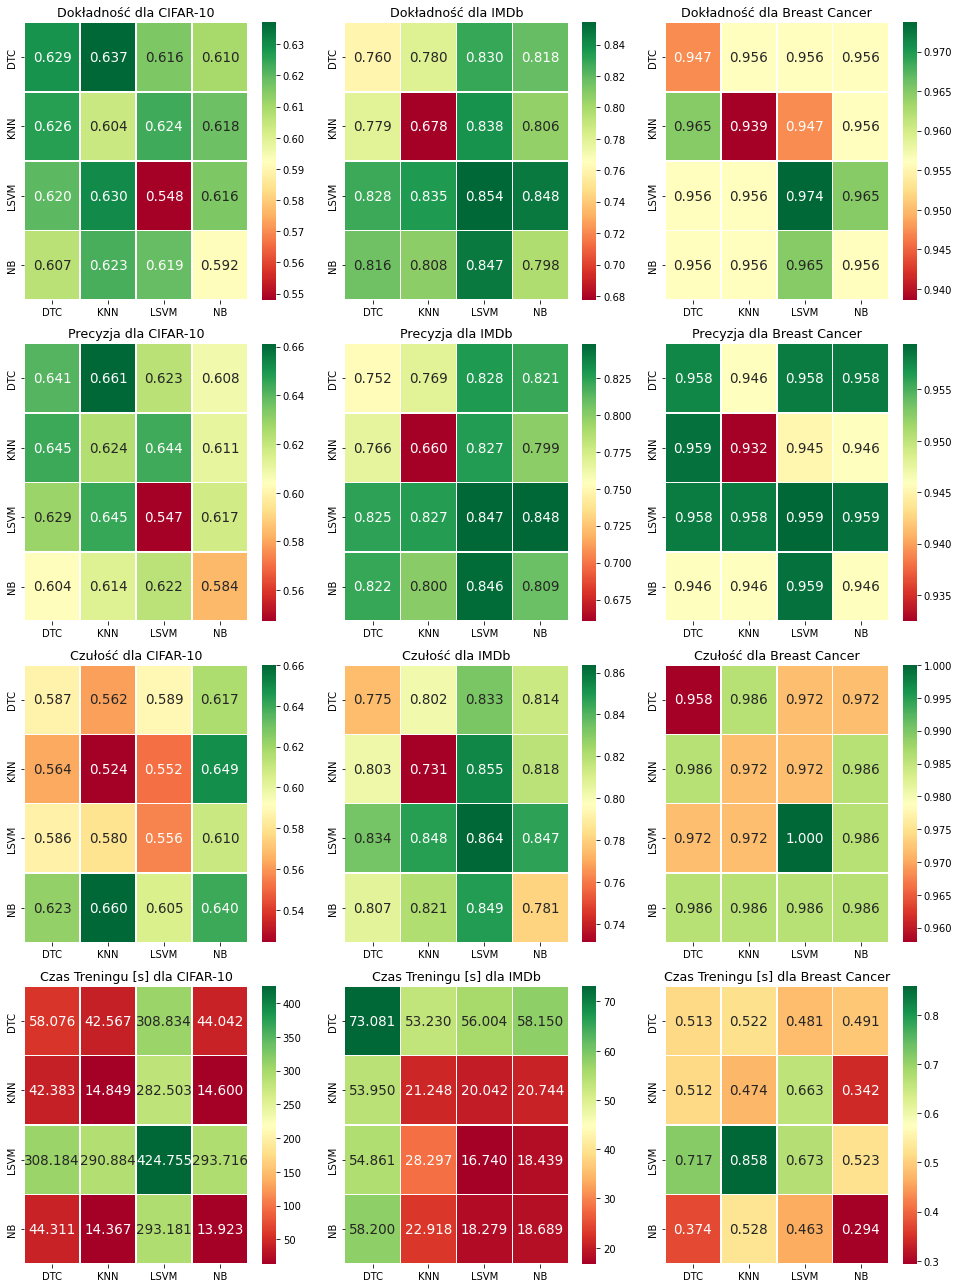

In [127]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import json

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

file_path_updated = 'executed_experiments/experiment_2_results_combined/all_results.json'
with open(file_path_updated, 'r') as file:
    lp_results_updated = json.load(file)
    
name_mapping = {
    'RandomForestClassifier()': 'RFC',
    'DecisionTreeClassifier()': 'DTC',
    'KNeighborsClassifier()': 'KNN',
    'LinearSVC(max_iter=10000)': 'LSVM',
    'SVC': 'SVC',
    'GaussianNB()': 'NB'
}

algorithm = "Tri_Training"
df_updated = pd.DataFrame(lp_results_updated)
df_updated = df_updated[df_updated.algorithm == algorithm]

df_updated['base_estimator_2'] = df_updated['hyperparameters'].apply(lambda x: str(eval(x)['base_estimator_2']))
df_updated['base_estimator_3'] = df_updated['hyperparameters'].apply(lambda x: str(eval(x)['base_estimator_3']))

df_updated.head()

datasets = ['cifar10', 'imdb','breast_cancer']
kernels = df_updated['base_estimator_2'].unique()

# metrics_for_plot = ['test_accuracy', 'test_precision', 'test_recall', 'test_f1_score', 'training_time']
# titles = ['Dokładność', 'Precyzja', 'Czułość', 'Miara F1', 'Czas Treningu']
metrics_for_plot = ['test_accuracy', 'test_precision', 'test_recall', 'training_time']
titles = ['Dokładność', 'Precyzja', 'Czułość', 'Czas Treningu [s]']

# Flatten the 'results_test' into separate columns
test_results_columns = df_updated['results_test'].apply(pd.Series)
df_updated = pd.concat([df_updated.drop(['results_test'], axis=1), test_results_columns], axis=1)
df_updated['base_estimator_2'] = df_updated['base_estimator_2'].map(name_mapping)
df_updated['base_estimator_3'] = df_updated['base_estimator_3'].map(name_mapping)

multiplier = 0.9
title_dic = {'cifar10': 'CIFAR-10', 'imdb': 'IMDb', 'breast_cancer': 'Breast Cancer'}

plt.figure(figsize=(15 * multiplier, 20 * multiplier))

for j, metric in enumerate(metrics_for_plot):
    for i, dataset in enumerate(datasets):
        # Przygotowanie danych dla heatmapy
        subset = df_updated[df_updated['dataset'] == dataset]
        pivot_table = subset.pivot("base_estimator_2", "base_estimator_3", metric)
        
        plt.subplot(len(metrics_for_plot), len(datasets), j * len(datasets) + i + 1)
        sns.heatmap(pivot_table, annot=True, fmt=".3f", linewidths=.5,annot_kws={"size": 15*multiplier}, cmap="RdYlGn", cbar=True)
        
        plt.title(f'{titles[j]} dla {title_dic[dataset]}', fontsize=14 * multiplier)
        plt.xlabel('', fontsize=12 * multiplier)
        plt.ylabel('', fontsize=12 * multiplier)

plt.tight_layout()
plt.savefig(f'plots/hyperparameters_{algorithm}.pdf')
plt.show()


### Assemble

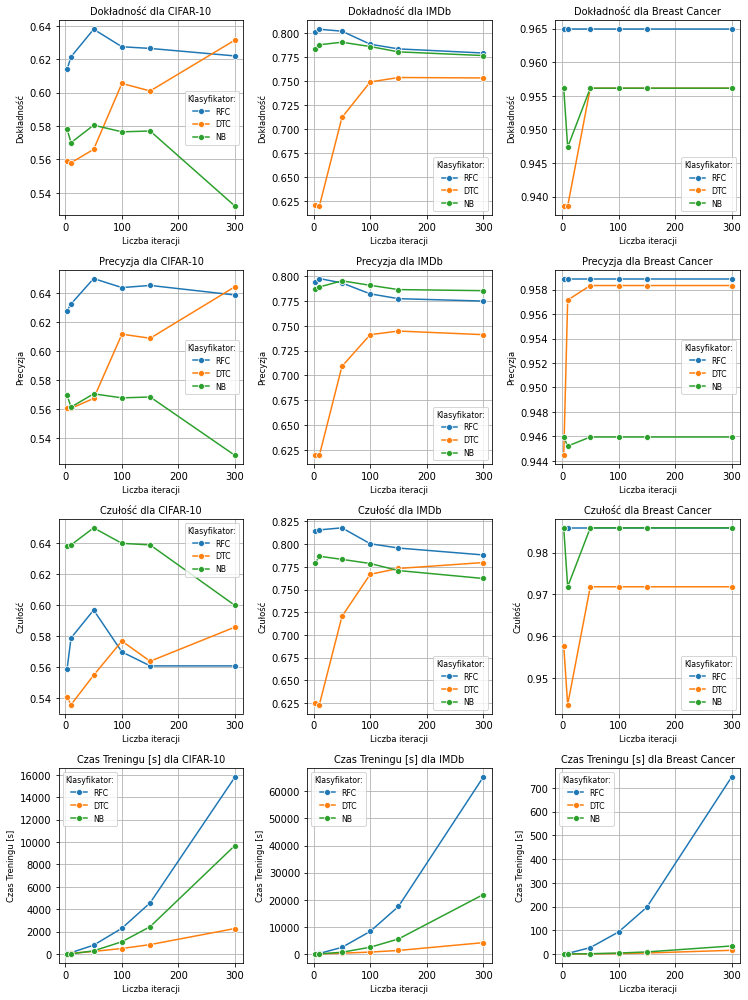

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

file_path_updated = 'executed_experiments/experiment_2_results_combined/all_results.json'
with open(file_path_updated, 'r') as file:
    lp_results_updated = json.load(file)
    
    
name_mapping = {
    'RandomForestClassifier()': 'RFC',
    'DecisionTreeClassifier()': 'DTC',
    'KNeighborsClassifier()': 'KNN',
    'LinearSVC(max_iter=10000)': 'LSVM',
    'SVC': 'SVC',
    'GaussianNB()': 'NB'
}
algorithm = "Assemble"
df_updated = pd.DataFrame(lp_results_updated)
df_updated = df_updated[df_updated.algorithm == algorithm]

df_updated['base_estimator'] = df_updated['hyperparameters'].apply(lambda x: str(eval(x)['base_estimator']))
df_updated['T'] = df_updated['hyperparameters'].apply(lambda x: eval(x)['T'])
df_updated['base_estimator'] = df_updated['base_estimator'].map(name_mapping)
df_updated.head()

datasets = df_updated['dataset'].unique()
kernels = df_updated['base_estimator'].unique()

# metrics_for_plot = ['test_accuracy', 'test_precision', 'test_recall', 'test_f1_score', 'training_time']
# titles = ['Dokładność', 'Precyzja', 'Czułość', 'Miara F1', 'Czas Treningu']
metrics_for_plot = ['test_accuracy', 'test_precision', 'test_recall', 'training_time']
titles = ['Dokładność', 'Precyzja', 'Czułość', 'Czas Treningu [s]']

# Flatten the 'results_test' into separate columns
test_results_columns = df_updated['results_test'].apply(pd.Series)
df_updated = pd.concat([df_updated.drop(['results_test'], axis=1), test_results_columns], axis=1)


multiplier = 0.7
title_dic = {'cifar10' : 'CIFAR-10', 'imdb' : 'IMDb', 'breast_cancer' : 'Breast Cancer'}
#plt.figure(figsize=(20*multiplier, 15*multiplier))
#for i, dataset in enumerate(datasets):
    #for j, metric in enumerate(metrics_for_plot):
        #plt.subplot(len(datasets), len(metrics_for_plot), i * len(metrics_for_plot) + j + 1)
plt.figure(figsize=(15*multiplier, 20*multiplier))
for j, metric in enumerate(metrics_for_plot):
    for i, dataset in enumerate(datasets):
        plt.subplot(len(metrics_for_plot), len(datasets), j * len(datasets) + i + 1)
        for kernel in kernels:
            subset = df_updated[(df_updated['dataset'] == dataset) & (df_updated['base_estimator'] == kernel)]
            sns.lineplot(data=subset, x='T', y=metric, label=kernel, marker='o')
        plt.title(f'{titles[j]} dla {title_dic[dataset]}', fontsize=14*multiplier)
        plt.xlabel('Liczba iteracji', fontsize=12*multiplier)
        plt.ylabel(titles[j], fontsize=12*multiplier)
        plt.legend(title='Klasyfikator:', fontsize=11*multiplier, title_fontsize=11*multiplier)
        plt.grid()

plt.tight_layout()
plt.savefig(f'plots/hyperparameters_{algorithm}.pdf')
plt.show()

### SemiBoost

#### Kernel RBF

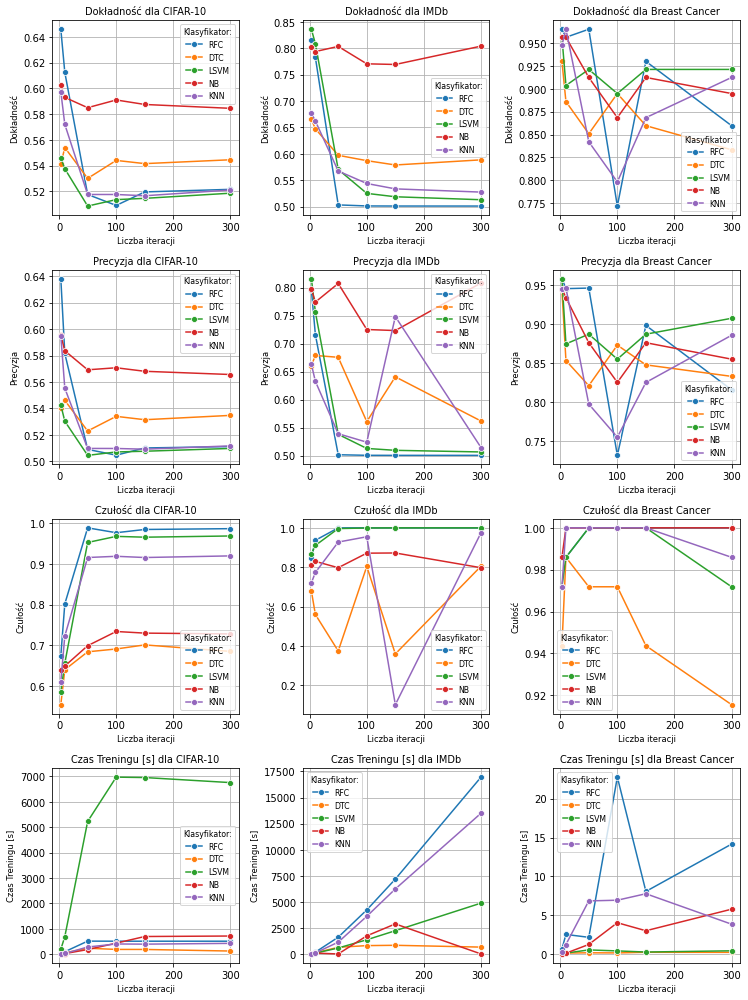

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

file_path_updated = 'executed_experiments/experiment_2_results_combined/all_results.json'
with open(file_path_updated, 'r') as file:
    lp_results_updated = json.load(file)
    
    
algorithm = "SemiBoost"
df_updated = pd.DataFrame(lp_results_updated)
df_updated = df_updated[df_updated.algorithm == algorithm]

df_updated['base_estimator'] = df_updated['hyperparameters'].apply(lambda x: str(eval(x)['base_estimator']))
df_updated['T'] = df_updated['hyperparameters'].apply(lambda x: eval(x)['T'])
df_updated['base_estimator'] = df_updated['base_estimator'].map(name_mapping)
df_updated.head()

datasets = df_updated['dataset'].unique()
kernels = df_updated['base_estimator'].unique()

# metrics_for_plot = ['test_accuracy', 'test_precision', 'test_recall', 'test_f1_score', 'training_time']
# titles = ['Dokładność', 'Precyzja', 'Czułość', 'Miara F1', 'Czas Treningu']
metrics_for_plot = ['test_accuracy', 'test_precision', 'test_recall', 'training_time']
titles = ['Dokładność', 'Precyzja', 'Czułość', 'Czas Treningu [s]']

# Flatten the 'results_test' into separate columns
test_results_columns = df_updated['results_test'].apply(pd.Series)
df_updated = pd.concat([df_updated.drop(['results_test'], axis=1), test_results_columns], axis=1)

multiplier = 0.7
title_dic = {'cifar10' : 'CIFAR-10', 'imdb' : 'IMDb', 'breast_cancer' : 'Breast Cancer'}
#plt.figure(figsize=(20*multiplier, 15*multiplier))
#for i, dataset in enumerate(datasets):
    #for j, metric in enumerate(metrics_for_plot):
        #plt.subplot(len(datasets), len(metrics_for_plot), i * len(metrics_for_plot) + j + 1)
plt.figure(figsize=(15*multiplier, 20*multiplier))
for j, metric in enumerate(metrics_for_plot):
    for i, dataset in enumerate(datasets):
        plt.subplot(len(metrics_for_plot), len(datasets), j * len(datasets) + i + 1)
        for kernel in kernels:
            subset = df_updated[(df_updated['dataset'] == dataset) & (df_updated['base_estimator'] == kernel)]
            sns.lineplot(data=subset, x='T', y=metric, label=kernel, marker='o')
        plt.title(f'{titles[j]} dla {title_dic[dataset]}', fontsize=14*multiplier)
        plt.xlabel('Liczba iteracji', fontsize=12*multiplier)
        plt.ylabel(titles[j], fontsize=12*multiplier)
        plt.legend(title='Klasyfikator:', fontsize=11*multiplier, title_fontsize=11*multiplier)
        plt.grid()

plt.tight_layout()
plt.savefig(f'plots/hyperparameters_{algorithm}.pdf')
plt.show()

#### Kernel KNN

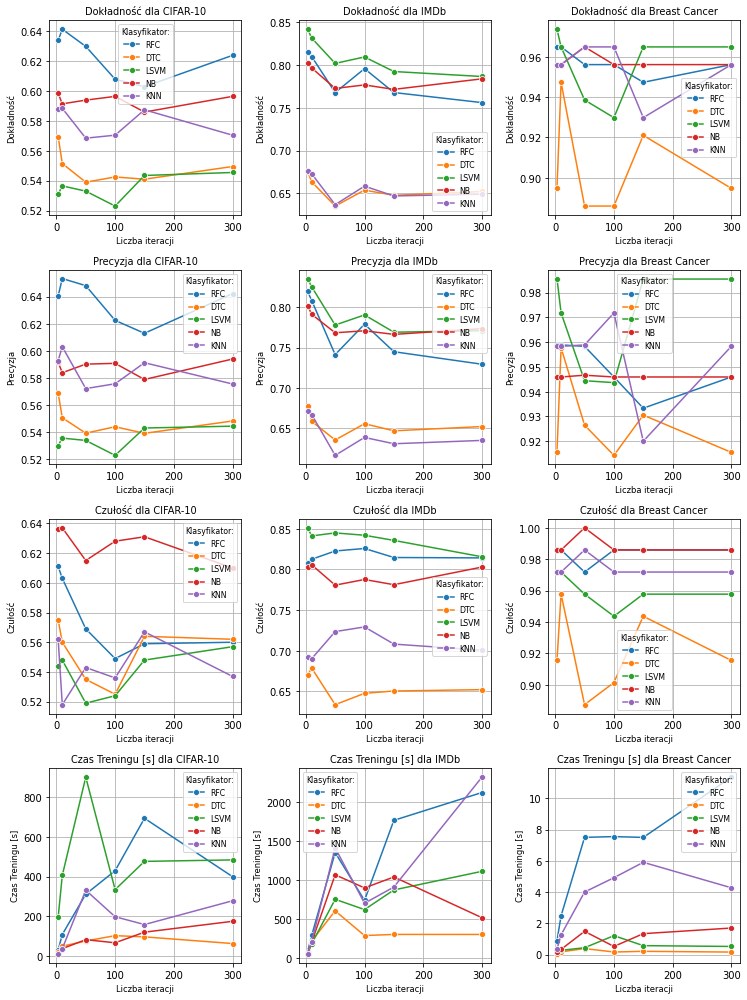

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

file_path_updated = 'executed_experiments/experiments_results_all_exp2_additional_experiments/all_results.json'
with open(file_path_updated, 'r') as file:
    lp_results_updated = json.load(file)
    
    
algorithm = "SemiBoost"
df_updated = pd.DataFrame(lp_results_updated)
df_updated = df_updated[df_updated.algorithm == algorithm]

df_updated['base_estimator'] = df_updated['hyperparameters'].apply(lambda x: str(eval(x)['base_estimator']))
df_updated['T'] = df_updated['hyperparameters'].apply(lambda x: eval(x)['T'])
df_updated['base_estimator'] = df_updated['base_estimator'].map(name_mapping)
df_updated.head()

datasets = ['cifar10', 'imdb','breast_cancer']
kernels = df_updated['base_estimator'].unique()

# metrics_for_plot = ['test_accuracy', 'test_precision', 'test_recall', 'test_f1_score', 'training_time']
# titles = ['Dokładność', 'Precyzja', 'Czułość', 'Miara F1', 'Czas Treningu']
metrics_for_plot = ['test_accuracy', 'test_precision', 'test_recall', 'training_time']
titles = ['Dokładność', 'Precyzja', 'Czułość', 'Czas Treningu [s]']

# Flatten the 'results_test' into separate columns
test_results_columns = df_updated['results_test'].apply(pd.Series)
df_updated = pd.concat([df_updated.drop(['results_test'], axis=1), test_results_columns], axis=1)

multiplier = 0.7
title_dic = {'cifar10' : 'CIFAR-10', 'imdb' : 'IMDb', 'breast_cancer' : 'Breast Cancer'}
#plt.figure(figsize=(20*multiplier, 15*multiplier))
#for i, dataset in enumerate(datasets):
    #for j, metric in enumerate(metrics_for_plot):
        #plt.subplot(len(datasets), len(metrics_for_plot), i * len(metrics_for_plot) + j + 1)
plt.figure(figsize=(15*multiplier, 20*multiplier))
for j, metric in enumerate(metrics_for_plot):
    for i, dataset in enumerate(datasets):
        plt.subplot(len(metrics_for_plot), len(datasets), j * len(datasets) + i + 1)
        for kernel in kernels:
            subset = df_updated[(df_updated['dataset'] == dataset) & (df_updated['base_estimator'] == kernel)]
            sns.lineplot(data=subset, x='T', y=metric, label=kernel, marker='o')
        plt.title(f'{titles[j]} dla {title_dic[dataset]}', fontsize=14*multiplier)
        plt.xlabel('Liczba iteracji', fontsize=12*multiplier)
        plt.ylabel(titles[j], fontsize=12*multiplier)
        plt.legend(title='Klasyfikator:', fontsize=11*multiplier, title_fontsize=11*multiplier)
        plt.grid()

plt.tight_layout()
plt.savefig(f'plots/hyperparameters_{algorithm}_knn.pdf')
plt.show()

### LapSVM

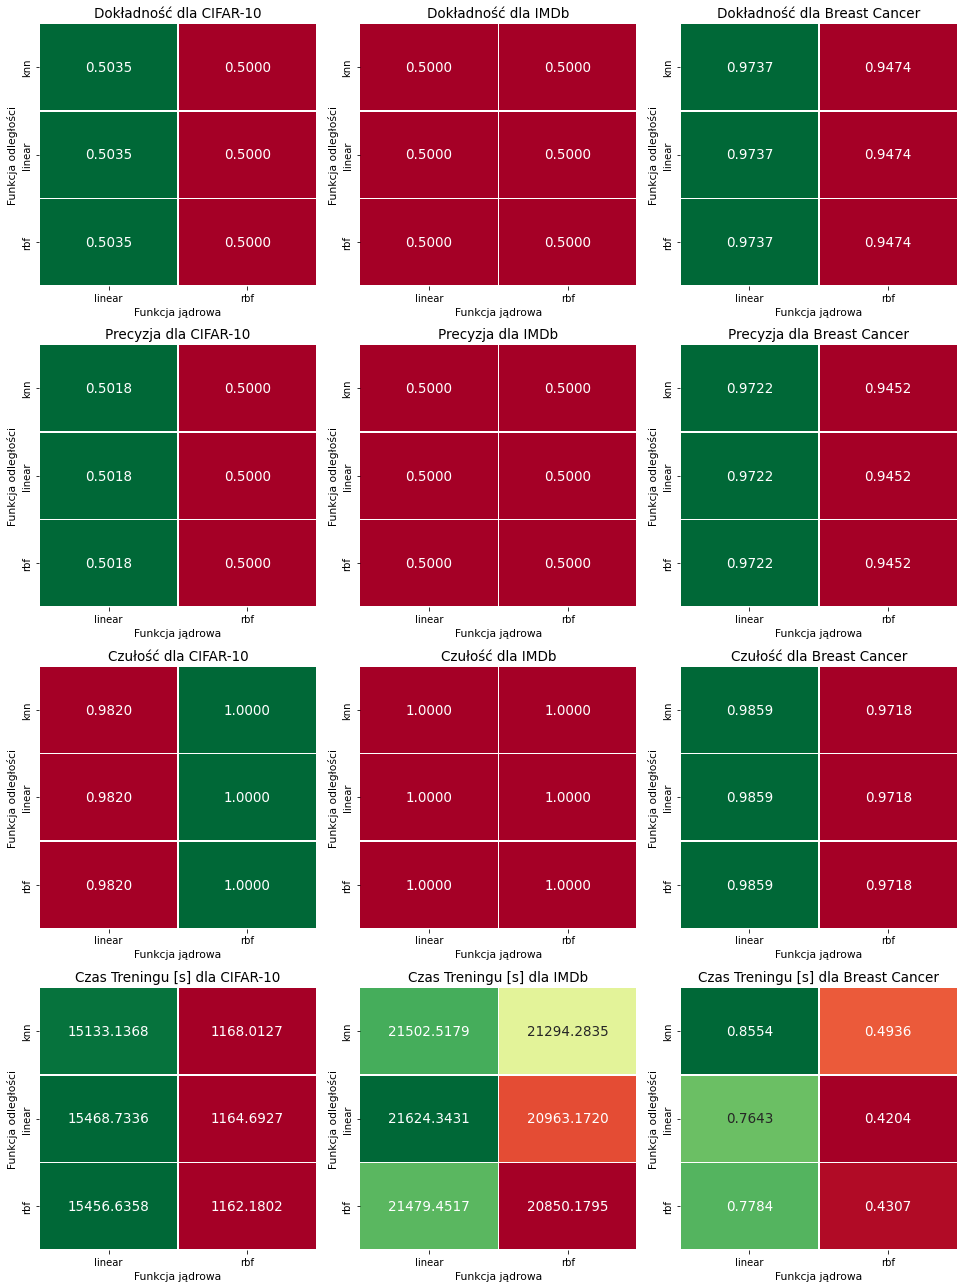

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import json

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

file_path_updated = 'executed_experiments/experiment_2_results_combined/all_results.json'
with open(file_path_updated, 'r') as file:
    lp_results_updated = json.load(file)
    
    
algorithm = "LapSVM"
df_updated = pd.DataFrame(lp_results_updated)
df_updated = df_updated[df_updated.algorithm == algorithm]

df_updated['distance_function'] = df_updated['hyperparameters'].apply(lambda x: eval(x)['distance_function'])
df_updated['kernel_function'] = df_updated['hyperparameters'].apply(lambda x: eval(x)['kernel_function'])

df_updated.head()

datasets = df_updated['dataset'].unique()
kernels = df_updated['distance_function'].unique()

# metrics_for_plot = ['test_accuracy', 'test_precision', 'test_recall', 'test_f1_score', 'training_time']
# titles = ['Dokładność', 'Precyzja', 'Czułość', 'Miara F1', 'Czas Treningu']
metrics_for_plot = ['test_accuracy', 'test_precision', 'test_recall', 'training_time']
titles = ['Dokładność', 'Precyzja', 'Czułość', 'Czas Treningu [s]']

# Flatten the 'results_test' into separate columns
test_results_columns = df_updated['results_test'].apply(pd.Series)
df_updated = pd.concat([df_updated.drop(['results_test'], axis=1), test_results_columns], axis=1)


multiplier = 0.9
title_dic = {'cifar10': 'CIFAR-10', 'imdb': 'IMDb', 'breast_cancer': 'Breast Cancer'}
plt.figure(figsize=(15 * multiplier, 20 * multiplier))

for j, metric in enumerate(metrics_for_plot):
    for i, dataset in enumerate(datasets):
        # Przygotowanie danych dla heatmapy
        subset = df_updated[df_updated['dataset'] == dataset]
        pivot_table = subset.pivot("distance_function", "kernel_function", metric)
        
        plt.subplot(len(metrics_for_plot), len(datasets), j * len(datasets) + i + 1)
        sns.heatmap(pivot_table, annot=True, fmt=".4f", linewidths=.5,annot_kws={"size": 15*multiplier}, cmap="RdYlGn", cbar=False)
        
        plt.title(f'{titles[j]} dla {title_dic[dataset]}', fontsize=15 * multiplier)
        plt.xlabel('Funkcja jądrowa', fontsize=12 * multiplier)
        plt.ylabel('Funkcja odległości', fontsize=12 * multiplier)

plt.tight_layout()
plt.savefig(f'plots/hyperparameters_{algorithm}.pdf')
plt.show()


### TSVM

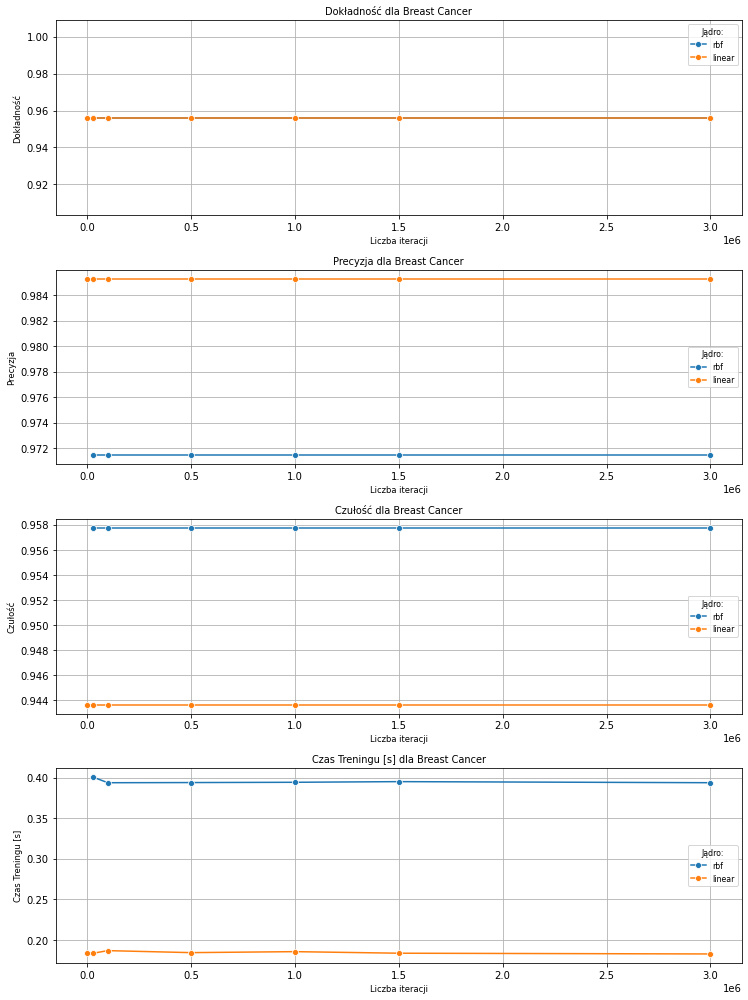

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json

file_path_updated = 'executed_experiments/experiment_2_results_combined/all_results.json'
with open(file_path_updated, 'r') as file:
    lp_results_updated = json.load(file)
    
    
algorithm = "TSVM"
df_updated = pd.DataFrame(lp_results_updated)
df_updated = df_updated[df_updated.algorithm == algorithm]


df_updated['kernel'] = df_updated['hyperparameters'].apply(lambda x: eval(x)['kernel'])
df_updated['max_iter'] = df_updated['hyperparameters'].apply(lambda x: eval(x)['max_iter'])

df_updated.head()

datasets = df_updated['dataset'].unique()
kernels = df_updated['kernel'].unique()

# metrics_for_plot = ['test_accuracy', 'test_precision', 'test_recall', 'test_f1_score', 'training_time']
# titles = ['Dokładność', 'Precyzja', 'Czułość', 'Miara F1', 'Czas Treningu']
metrics_for_plot = ['test_accuracy', 'test_precision', 'test_recall', 'training_time']
titles = ['Dokładność', 'Precyzja', 'Czułość', 'Czas Treningu [s]']

# Flatten the 'results_test' into separate columns
test_results_columns = df_updated['results_test'].apply(pd.Series)
df_updated = pd.concat([df_updated.drop(['results_test'], axis=1), test_results_columns], axis=1)

multiplier = 0.7
title_dic = {'cifar10' : 'CIFAR-10', 'imdb' : 'IMDb', 'breast_cancer' : 'Breast Cancer'}
#plt.figure(figsize=(20*multiplier, 15*multiplier))
#for i, dataset in enumerate(datasets):
    #for j, metric in enumerate(metrics_for_plot):
        #plt.subplot(len(datasets), len(metrics_for_plot), i * len(metrics_for_plot) + j + 1)
plt.figure(figsize=(15*multiplier, 20*multiplier))
for j, metric in enumerate(metrics_for_plot):
    for i, dataset in enumerate(datasets):
        plt.subplot(len(metrics_for_plot), len(datasets), j * len(datasets) + i + 1)
        for kernel in kernels:
            subset = df_updated[(df_updated['dataset'] == dataset) & (df_updated['kernel'] == kernel)]
            sns.lineplot(data=subset, x='max_iter', y=metric, label=kernel, marker='o')
        plt.title(f'{titles[j]} dla {title_dic[dataset]}', fontsize=14*multiplier)
        plt.xlabel('Liczba iteracji', fontsize=12*multiplier)
        plt.ylabel(titles[j], fontsize=12*multiplier)
        plt.legend(title='Jądro:', fontsize=11*multiplier, title_fontsize=11*multiplier)
        plt.grid()

plt.tight_layout()
plt.savefig(f'plots/hyperparameters_{algorithm}.pdf')
plt.show()

### Label Propagation

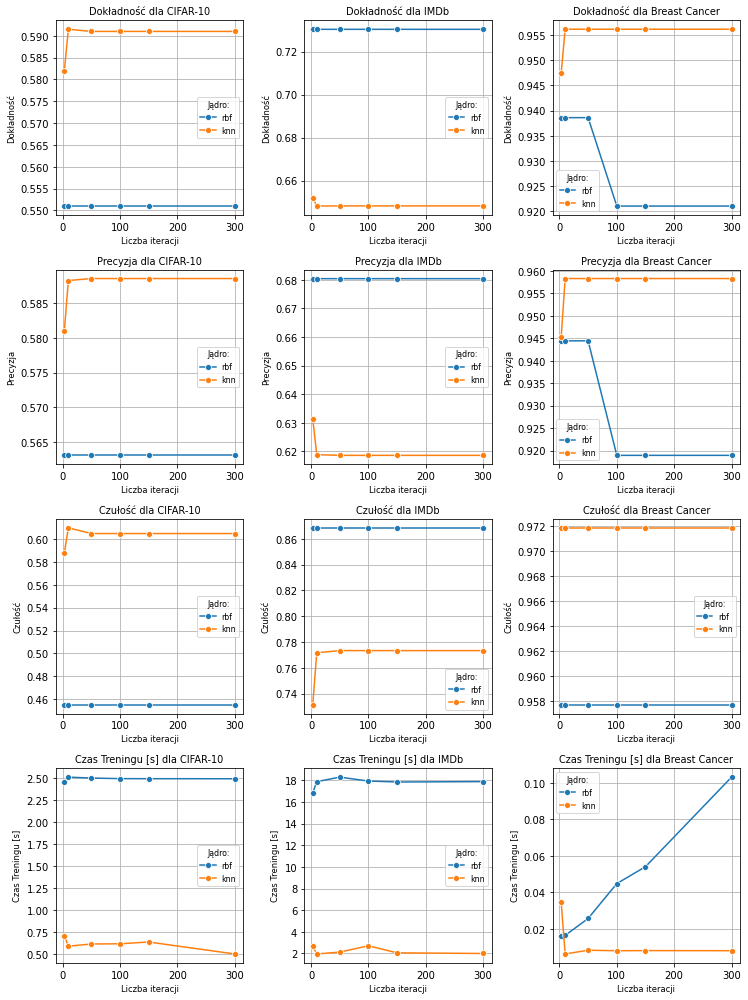

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json

file_path_updated = 'executed_experiments/experiment_2_results_combined/all_results.json'
with open(file_path_updated, 'r') as file:
    lp_results_updated = json.load(file)
    
    
algorithm = "LabelPropagation"
df_updated = pd.DataFrame(lp_results_updated)
df_updated = df_updated[df_updated.algorithm == algorithm]


df_updated['kernel'] = df_updated['hyperparameters'].apply(lambda x: eval(x)['kernel'])
df_updated['max_iter'] = df_updated['hyperparameters'].apply(lambda x: eval(x)['max_iter'])

df_updated.head()

datasets = df_updated['dataset'].unique()
kernels = df_updated['kernel'].unique()

# metrics_for_plot = ['test_accuracy', 'test_precision', 'test_recall', 'test_f1_score', 'training_time']
# titles = ['Dokładność', 'Precyzja', 'Czułość', 'Miara F1', 'Czas Treningu']
metrics_for_plot = ['test_accuracy', 'test_precision', 'test_recall', 'training_time']
titles = ['Dokładność', 'Precyzja', 'Czułość', 'Czas Treningu [s]']

# Flatten the 'results_test' into separate columns
test_results_columns = df_updated['results_test'].apply(pd.Series)
df_updated = pd.concat([df_updated.drop(['results_test'], axis=1), test_results_columns], axis=1)

multiplier = 0.7
title_dic = {'cifar10' : 'CIFAR-10', 'imdb' : 'IMDb', 'breast_cancer' : 'Breast Cancer'}
#plt.figure(figsize=(20*multiplier, 15*multiplier))
#for i, dataset in enumerate(datasets):
    #for j, metric in enumerate(metrics_for_plot):
        #plt.subplot(len(datasets), len(metrics_for_plot), i * len(metrics_for_plot) + j + 1)
plt.figure(figsize=(15*multiplier, 20*multiplier))
for j, metric in enumerate(metrics_for_plot):
    for i, dataset in enumerate(datasets):
        plt.subplot(len(metrics_for_plot), len(datasets), j * len(datasets) + i + 1)
        for kernel in kernels:
            subset = df_updated[(df_updated['dataset'] == dataset) & (df_updated['kernel'] == kernel)]
            sns.lineplot(data=subset, x='max_iter', y=metric, label=kernel, marker='o')
        plt.title(f'{titles[j]} dla {title_dic[dataset]}', fontsize=14*multiplier)
        plt.xlabel('Liczba iteracji', fontsize=12*multiplier)
        plt.ylabel(titles[j], fontsize=12*multiplier)
        plt.legend(title='Jądro:', fontsize=11*multiplier, title_fontsize=11*multiplier)
        plt.grid()

plt.tight_layout()
plt.savefig(f'plots/hyperparameters_{algorithm}.pdf')
plt.show()

#### Różne gamma i knn

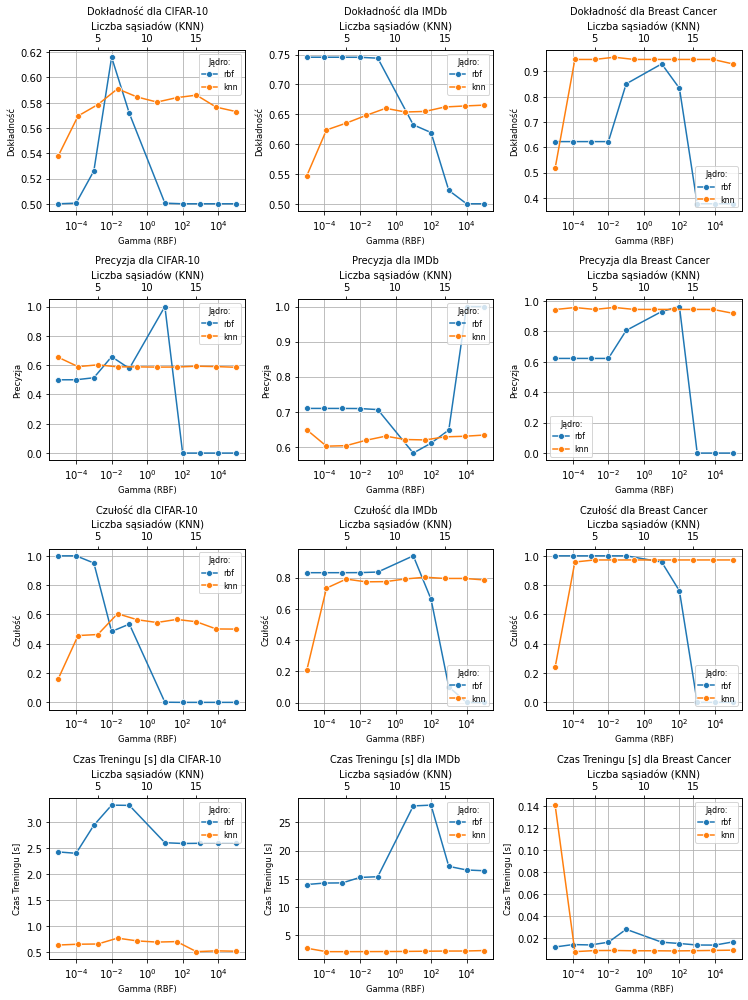

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json

file_path_updated = 'executed_experiments/experiments_results_all_exp2_additional_experiments/all_results.json'
with open(file_path_updated, 'r') as file:
    lp_results_updated = json.load(file)
    
algorithm = "LabelPropagation"
df_updated = pd.DataFrame(lp_results_updated)
df_updated = df_updated[df_updated.algorithm == algorithm]

df_updated['hyperparameters_dict'] = df_updated['hyperparameters'].apply(lambda x: eval(x))
df_updated['kernel'] = df_updated['hyperparameters_dict'].apply(lambda x: x['kernel'])
df_updated['max_iter'] = df_updated['hyperparameters_dict'].apply(lambda x: x['max_iter'])
df_updated['gamma'] = df_updated['hyperparameters_dict'].apply(lambda x: x.get('gamma', None))
df_updated['n_neighbors'] = df_updated['hyperparameters_dict'].apply(lambda x: x.get('n_neighbors', None))

# Flatten the 'results_test' into separate columns
test_results_columns = df_updated['results_test'].apply(pd.Series)
df_updated = pd.concat([df_updated.drop(['results_test'], axis=1), test_results_columns], axis=1)

datasets = ['cifar10', 'imdb','breast_cancer']
kernels = df_updated['kernel'].unique()

metrics_for_plot = ['test_accuracy', 'test_precision', 'test_recall', 'training_time']
titles = ['Dokładność', 'Precyzja', 'Czułość', 'Czas Treningu [s]']

multiplier = 0.7
title_dic = {'cifar10' : 'CIFAR-10', 'imdb' : 'IMDb', 'breast_cancer' : 'Breast Cancer'}

plt.figure(figsize=(15*multiplier, 20*multiplier))
for j, metric in enumerate(metrics_for_plot):
    for i, dataset in enumerate(datasets):
        ax = plt.subplot(len(metrics_for_plot), len(datasets), j * len(datasets) + i + 1)
        ax2 = ax.twiny()  # Tworzymy drugą oś X
        ax2.set_xlabel('Liczba sąsiadów (KNN)')
        ax2.set_xscale('linear')  # Skala liniowa dla osi X knn
        ax.set_xscale('log')  # Skala logarytmiczna dla osi X rbf
        ax.grid(None)

        for kernel in kernels:
            subset = df_updated[(df_updated['dataset'] == dataset) & (df_updated['kernel'] == kernel)]
            if kernel == 'rbf':
                sns.lineplot(data=subset, x='gamma', y=metric, label=f'{kernel}', marker='o', ax=ax, legend=False, color='C0')
            elif kernel == 'knn':
                sns.lineplot(data=subset, x='n_neighbors', y=metric, label=f'{kernel}', marker='o', ax=ax2, color='C1')

        plt.title(f'{titles[j]} dla {title_dic[dataset]}', fontsize=14*multiplier)
        ax.set_xlabel('Gamma (RBF)', fontsize=12*multiplier)
        ax.set_ylabel(titles[j], fontsize=12*multiplier)
        handles, labels = [], []
        for ax in [ax, ax2]:
            for handle, label in zip(*ax.get_legend_handles_labels()):
                handles.append(handle)
                labels.append(label)
        plt.legend(handles, labels, title='Jądro:', fontsize=11*multiplier, title_fontsize=11*multiplier)
plt.grid()

plt.tight_layout()
plt.savefig(f'plots/hyperparameters_{algorithm}_gamma_knn.pdf')
plt.show()

# Experiment 3

## Tri-training

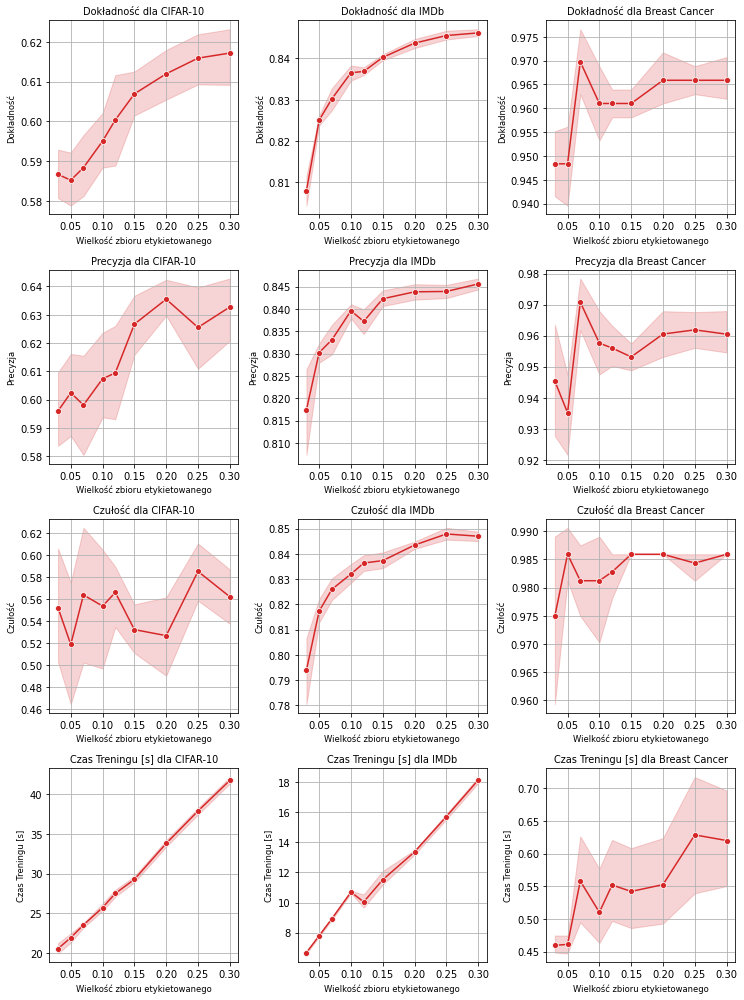

In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json

file_path_updated = 'executed_experiments/exp_3_all_results.json'
with open(file_path_updated, 'r') as file:
    lp_results_updated = json.load(file)
    
    
algorithm = "Tri_Training"
df_updated = pd.DataFrame(lp_results_updated)
df_updated = df_updated[df_updated.algorithm == algorithm]

datasets = df_updated['dataset'].unique()
labeled_size_list = [.03, .05, .07, .1, .12, .15, .20, .25, .30]
df_updated = df_updated[df_updated.labeled_size.isin(labeled_size_list)]
# metrics_for_plot = ['test_accuracy', 'test_precision', 'test_recall', 'test_f1_score', 'training_time']
# titles = ['Dokładność', 'Precyzja', 'Czułość', 'Miara F1', 'Czas Treningu']
metrics_for_plot = ['test_accuracy', 'test_precision', 'test_recall', 'training_time']
titles = ['Dokładność', 'Precyzja', 'Czułość', 'Czas Treningu [s]']

# Flatten the 'results_test' into separate columns
test_results_columns = df_updated['results_test'].apply(pd.Series)
df_updated = pd.concat([df_updated.drop(['results_test'], axis=1), test_results_columns], axis=1)

multiplier = 0.7
title_dic = {'cifar10' : 'CIFAR-10', 'imdb' : 'IMDb', 'breast_cancer' : 'Breast Cancer'}
#plt.figure(figsize=(20*multiplier, 15*multiplier))
#for i, dataset in enumerate(datasets):
    #for j, metric in enumerate(metrics_for_plot):
        #plt.subplot(len(datasets), len(metrics_for_plot), i * len(metrics_for_plot) + j + 1)
plt.figure(figsize=(15*multiplier, 20*multiplier))
for j, metric in enumerate(metrics_for_plot):
    for i, dataset in enumerate(datasets):
        plt.subplot(len(metrics_for_plot), len(datasets), j * len(datasets) + i + 1)
        subset = df_updated[df_updated['dataset'] == dataset]
        sns.lineplot(data=subset, x='labeled_size', y=metric, marker='o', color='C3')
        plt.title(f'{titles[j]} dla {title_dic[dataset]}', fontsize=14*multiplier)
        plt.xlabel('Wielkość zbioru etykietowanego', fontsize=12*multiplier)
        plt.ylabel(titles[j], fontsize=12*multiplier)
#         plt.legend(title='Jądro:', fontsize=11*multiplier, title_fontsize=11*multiplier)
        plt.grid()

plt.tight_layout()
plt.savefig(f'plots/exp3_{algorithm}.pdf')
plt.show()

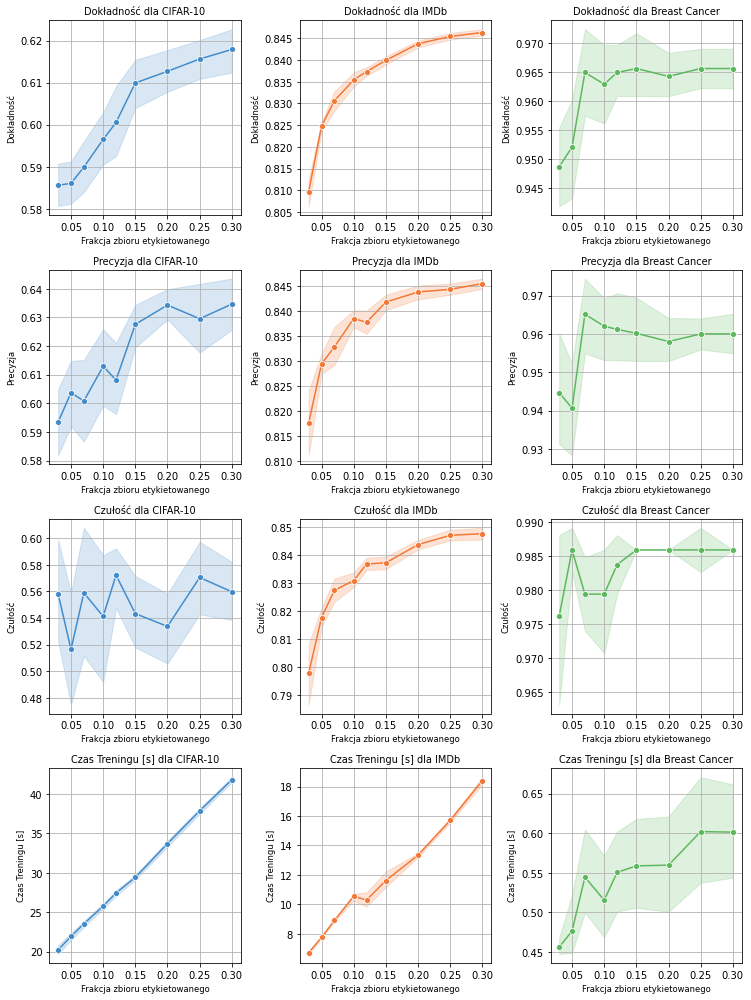

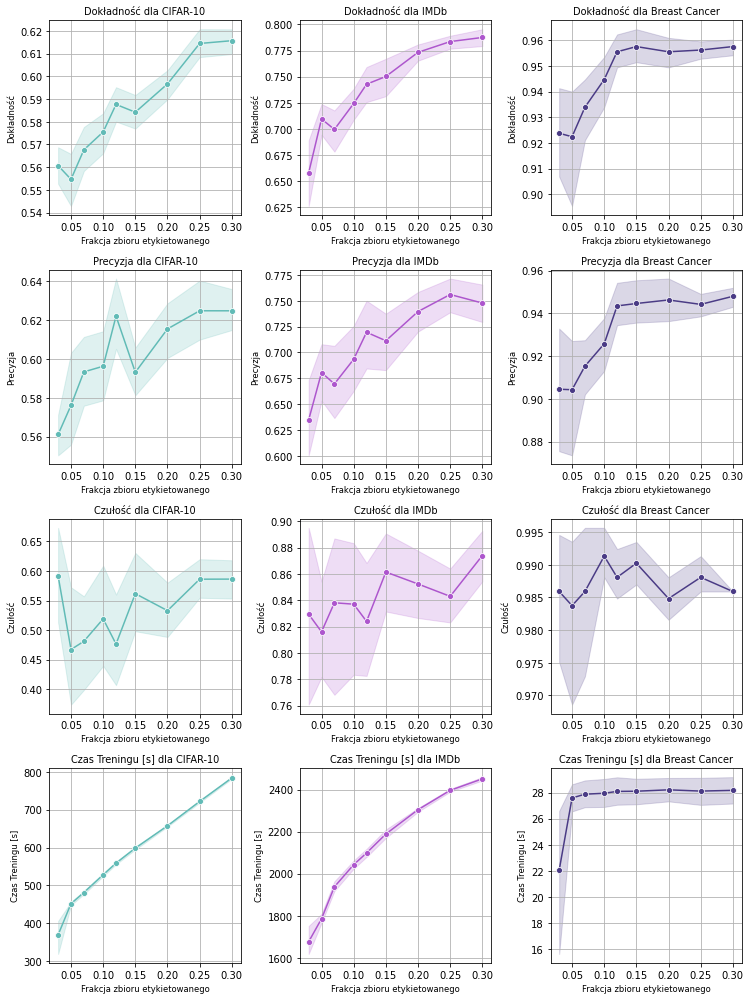

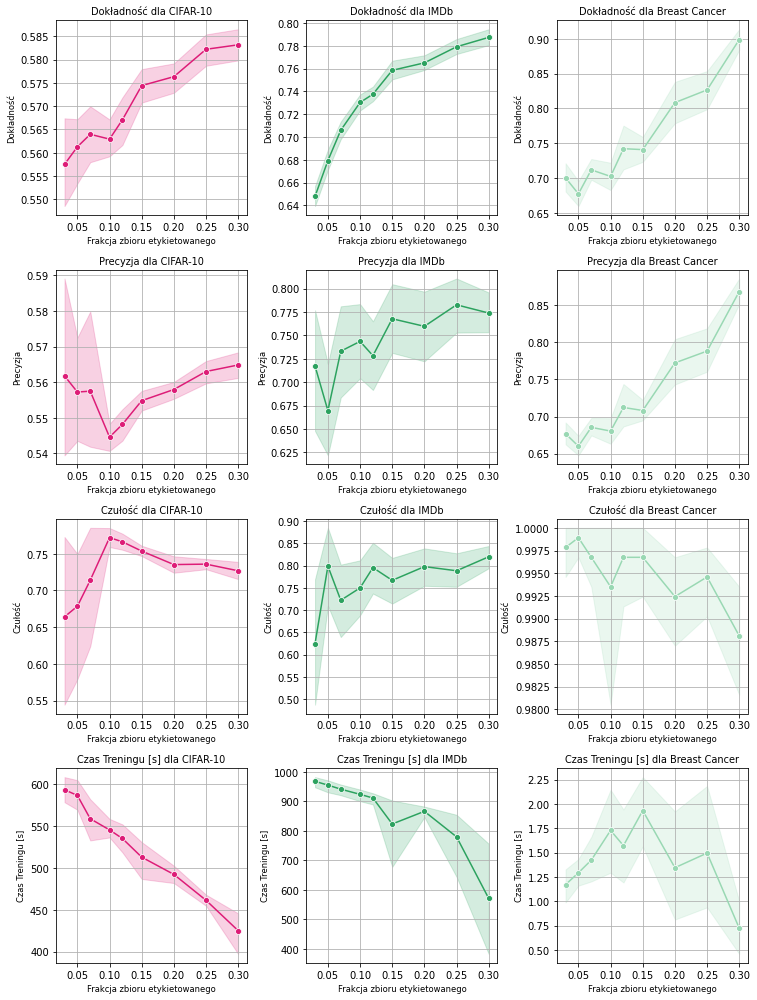

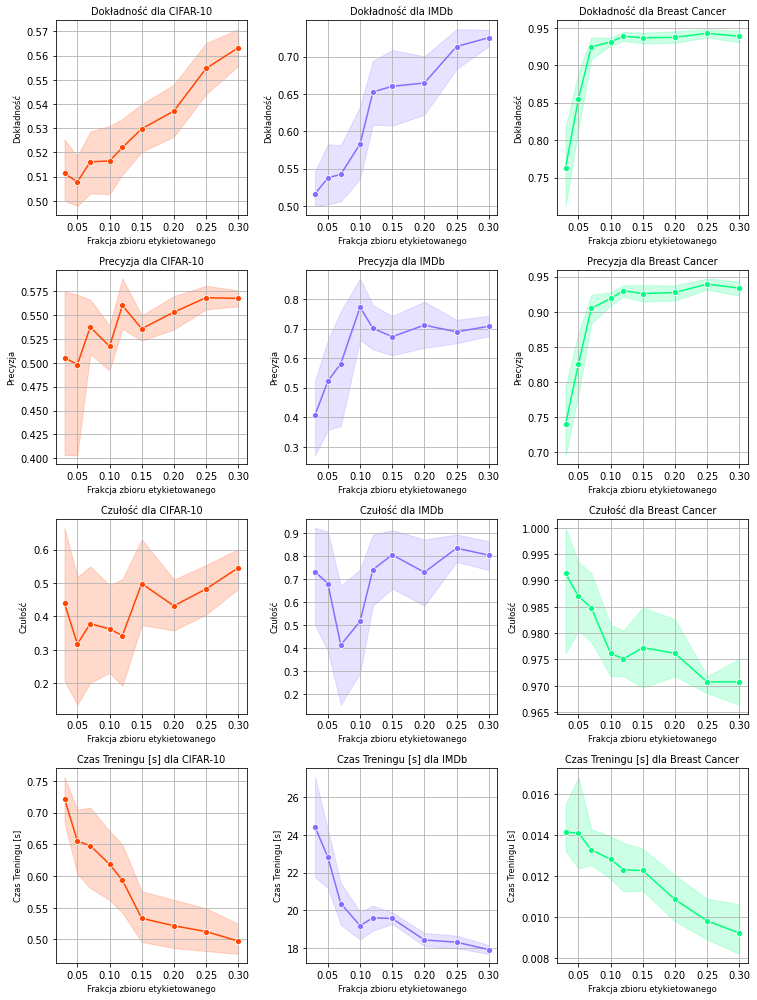

In [128]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json

file_path_updated = 'executed_experiments/exp_3_all_results.json'
with open(file_path_updated, 'r') as file:
    lp_results_updated = json.load(file)

plot_colors_1 = ['#428bca', '#f37735', '#5cb85c']
PlotTwist = ['#61bbb6', '#ad56cd', '#4a3b85']
Plots2classes = ['#dd1c77', '#2ca25f', '#99d8b3']
plot_colors_3 = ['#ff4500', '#836fff', '#00ff7f']

palete = [plot_colors_1, PlotTwist, Plots2classes, plot_colors_3]

palete_num=0
for algorithm in ['Tri_Training', 'Assemble', 'SemiBoost', 'LabelPropagation']:
    df_updated = pd.DataFrame(lp_results_updated)
    df_updated = df_updated[df_updated.algorithm == algorithm]

    datasets = ['cifar10', 'imdb','breast_cancer']
    labeled_size_list = [.03, .05, .07, .1, .12, .15, .20, .25, .30]
    df_updated = df_updated[df_updated.labeled_size.isin(labeled_size_list)]
    # metrics_for_plot = ['test_accuracy', 'test_precision', 'test_recall', 'test_f1_score', 'training_time']
    # titles = ['Dokładność', 'Precyzja', 'Czułość', 'Miara F1', 'Czas Treningu']
    metrics_for_plot = ['test_accuracy', 'test_precision', 'test_recall', 'training_time']
    titles = ['Dokładność', 'Precyzja', 'Czułość', 'Czas Treningu [s]']

    # Flatten the 'results_test' into separate columns
    test_results_columns = df_updated['results_test'].apply(pd.Series)
    df_updated = pd.concat([df_updated.drop(['results_test'], axis=1), test_results_columns], axis=1)

    multiplier = 0.7
    title_dic = {'cifar10' : 'CIFAR-10', 'imdb' : 'IMDb', 'breast_cancer' : 'Breast Cancer'}
    #plt.figure(figsize=(20*multiplier, 15*multiplier))
    #for i, dataset in enumerate(datasets):
        #for j, metric in enumerate(metrics_for_plot):
            #plt.subplot(len(datasets), len(metrics_for_plot), i * len(metrics_for_plot) + j + 1)
    plt.figure(figsize=(15*multiplier, 20*multiplier))
    for j, metric in enumerate(metrics_for_plot):
        for i, dataset in enumerate(datasets):
            plt.subplot(len(metrics_for_plot), len(datasets), j * len(datasets) + i + 1)
            subset = df_updated[df_updated['dataset'] == dataset]
            sns.lineplot(data=subset, x='labeled_size', y=metric, marker='o', color=palete[palete_num][i])
            plt.title(f'{titles[j]} dla {title_dic[dataset]}', fontsize=14*multiplier)
            plt.xlabel('Frakcja zbioru etykietowanego', fontsize=12*multiplier)
            plt.ylabel(titles[j], fontsize=12*multiplier)
    #         plt.legend(title='Jądro:', fontsize=11*multiplier, title_fontsize=11*multiplier)
            plt.grid()

    plt.tight_layout()
    plt.savefig(f'plots/exp3_{algorithm}.pdf')
    plt.show()
    palete_num+=1

## Boxploty

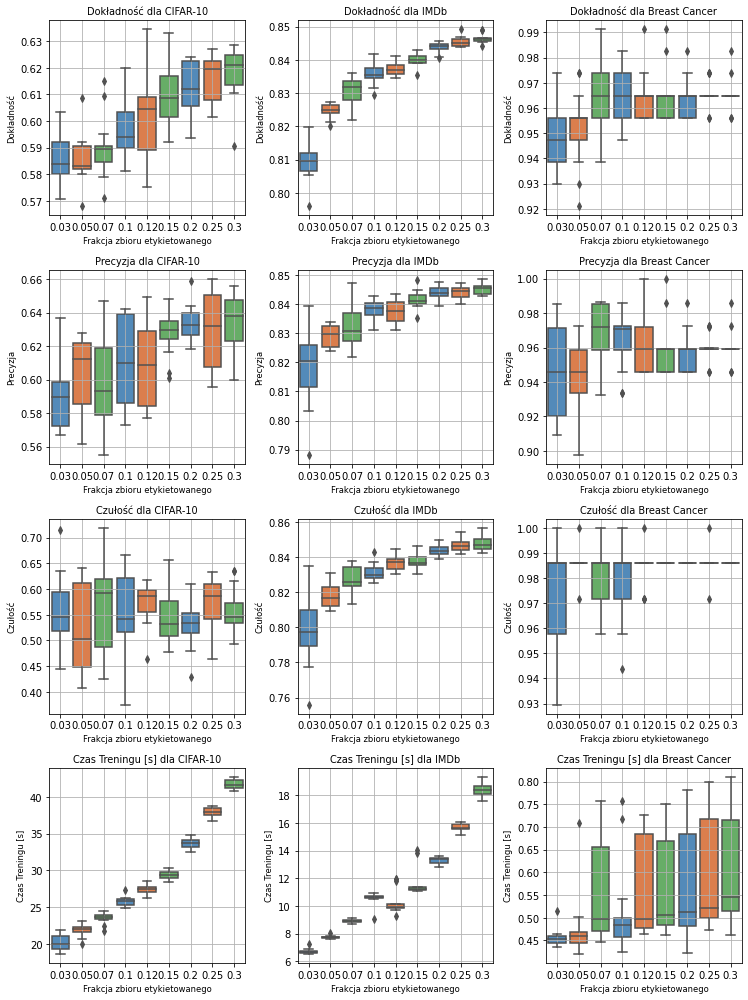

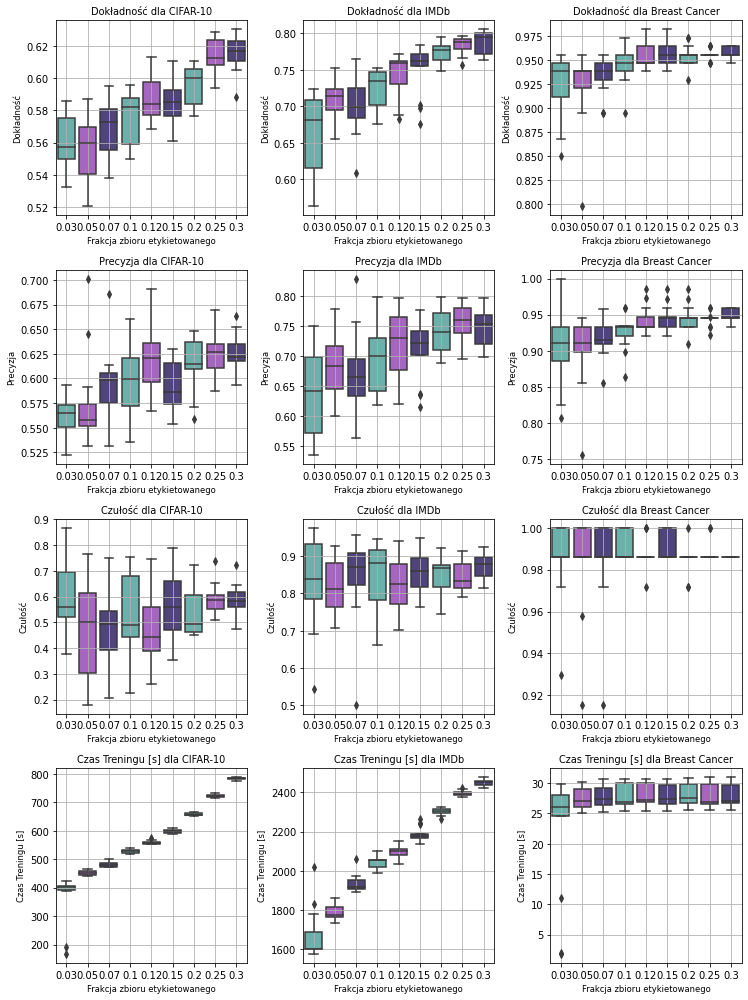

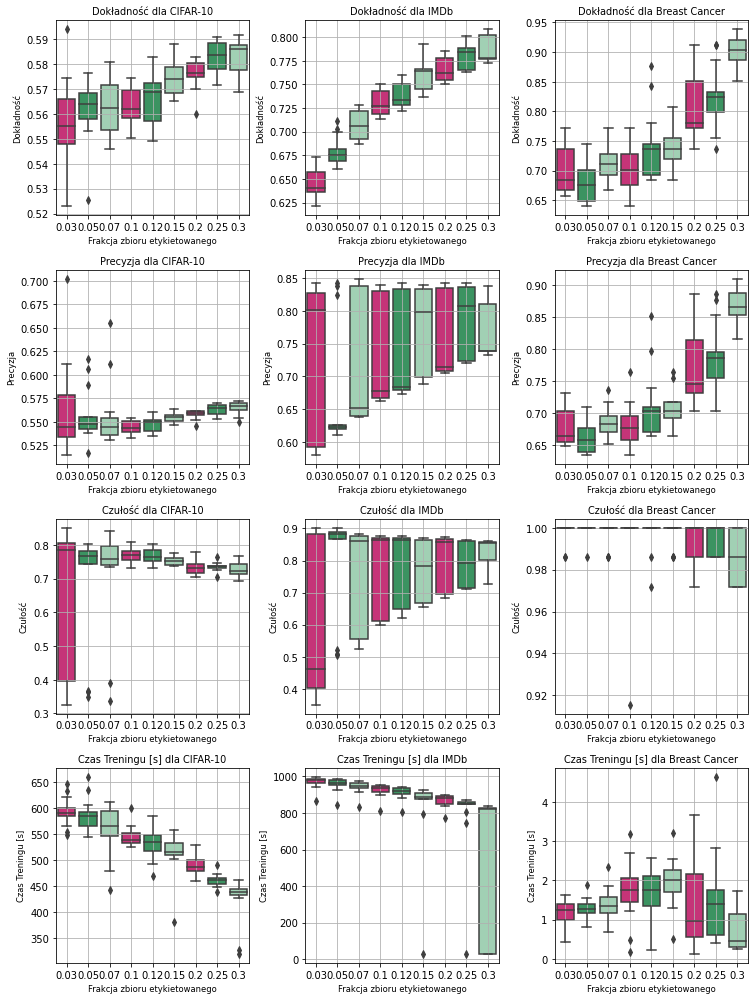

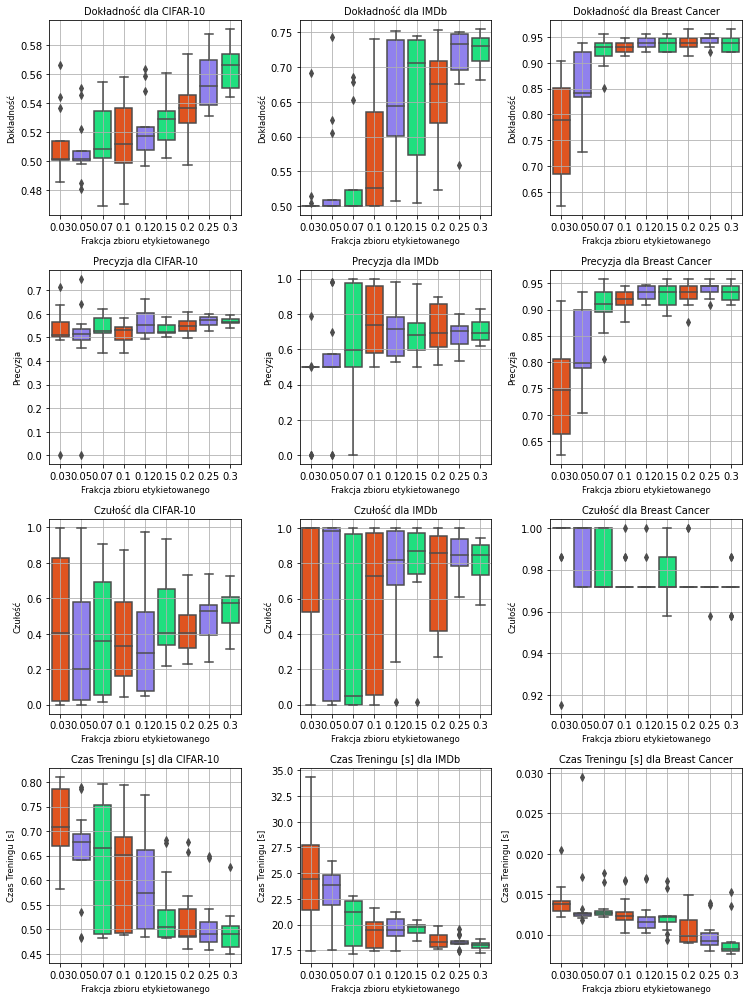

In [129]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json

file_path_updated = 'executed_experiments/exp_3_all_results.json'
with open(file_path_updated, 'r') as file:
    lp_results_updated = json.load(file)

plot_colors_1 = ['#428bca', '#f37735', '#5cb85c']
PlotTwist = ['#61bbb6', '#ad56cd', '#4a3b85']
Plots2classes = ['#dd1c77', '#2ca25f', '#99d8b3']
plot_colors_3 = ['#ff4500', '#836fff', '#00ff7f']

palete = [plot_colors_1, PlotTwist, Plots2classes, plot_colors_3]

palete_num = 0
for algorithm in ['Tri_Training', 'Assemble', 'SemiBoost', 'LabelPropagation']:
    df_updated = pd.DataFrame(lp_results_updated)
    df_updated = df_updated[df_updated.algorithm == algorithm]

    datasets = ['cifar10', 'imdb', 'breast_cancer']
    labeled_size_list = [.03, .05, .07, .1, .12, .15, .20, .25, .30]
    df_updated = df_updated[df_updated.labeled_size.isin(labeled_size_list)]

    metrics_for_plot = ['test_accuracy', 'test_precision', 'test_recall', 'training_time']
    titles = ['Dokładność', 'Precyzja', 'Czułość', 'Czas Treningu [s]']

    # Flatten the 'results_test' into separate columns
    test_results_columns = df_updated['results_test'].apply(pd.Series)
    df_updated = pd.concat([df_updated.drop(['results_test'], axis=1), test_results_columns], axis=1)

    multiplier = 0.7
    title_dic = {'cifar10': 'CIFAR-10', 'imdb': 'IMDb', 'breast_cancer': 'Breast Cancer'}

    plt.figure(figsize=(15 * multiplier, 20 * multiplier))
    for j, metric in enumerate(metrics_for_plot):
        for i, dataset in enumerate(datasets):
            plt.subplot(len(metrics_for_plot), len(datasets), j * len(datasets) + i + 1)
            subset = df_updated[df_updated['dataset'] == dataset]
            sns.boxplot(data=subset, x='labeled_size', y=metric, palette=palete[palete_num])
            plt.title(f'{titles[j]} dla {title_dic[dataset]}', fontsize=14 * multiplier)
            plt.xlabel('Frakcja zbioru etykietowanego', fontsize=12 * multiplier)
            plt.ylabel(titles[j], fontsize=12 * multiplier)
            plt.grid()

    plt.tight_layout()
    plt.savefig(f'plots/exp3_{algorithm}_boxplots.pdf')
    plt.show()
    palete_num += 1
